# 使用文本作为路径

{class}`~matplotlib.text.TextPath` 创建 {class}`~matplotlib.path.Path`，该路径是文本字符的轮廓。生成的路径可以例如用作图像的剪切路径。

RuntimeError: latex was not able to process the following string:
b'textpath supports \\\\TeX'

Here is the full command invocation and its output:

latex -interaction=nonstopmode --halt-on-error --output-directory=tmp3edghr7g 152ce37b8c915b815a2d120ebb44ecad.tex

This is pdfTeX, Version 3.141592653-2.6-1.40.22 (TeX Live 2021) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(./152ce37b8c915b815a2d120ebb44ecad.tex
LaTeX2e <2020-10-01> patch level 4
L3 programming layer <2021-02-18>
(/media/pc/data/lxw/envs/anaconda3a/envs/ai/share/tinytex/texmf-dist/tex/latex/
base/article.cls
Document Class: article 2020/04/10 v1.4m Standard LaTeX document class

(/media/pc/data/lxw/envs/anaconda3a/envs/ai/share/tinytex/texmf-dist/tex/latex/
base/size10.clo))

! LaTeX Error: File `type1cm.sty' not found.

Type X to quit or <RETURN> to proceed,
or enter new name. (Default extension: sty)

Enter file name: 
! Emergency stop.
<read *> 
         
l.7 \usepackage
               {type1ec}^^M
No pages of output.
Transcript written on tmp3edghr7g/152ce37b8c915b815a2d120ebb44ecad.log.




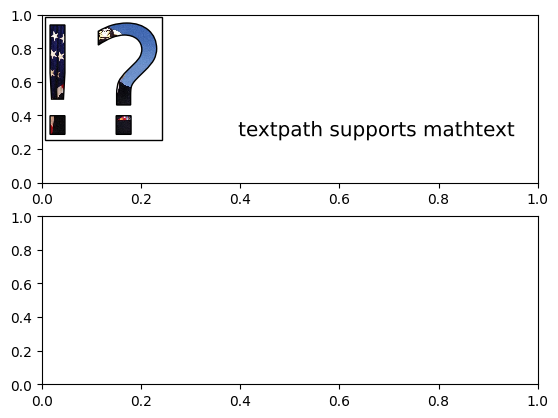

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.cbook import get_sample_data
from matplotlib.image import BboxImage
from matplotlib.offsetbox import (AnchoredOffsetbox, AnnotationBbox,
                                  AuxTransformBox)
from matplotlib.patches import PathPatch, Shadow
from matplotlib.text import TextPath
from matplotlib.transforms import IdentityTransform


class PathClippedImagePatch(PathPatch):
    """
    The given image is used to draw the face of the patch. Internally,
    it uses BboxImage whose clippath set to the path of the patch.

    FIXME : The result is currently dpi dependent.
    """

    def __init__(self, path, bbox_image, **kwargs):
        super().__init__(path, **kwargs)
        self.bbox_image = BboxImage(
            self.get_window_extent, norm=None, origin=None)
        self.bbox_image.set_data(bbox_image)

    def set_facecolor(self, color):
        """Simply ignore facecolor."""
        super().set_facecolor("none")

    def draw(self, renderer=None):
        # the clip path must be updated every draw. any solution? -JJ
        self.bbox_image.set_clip_path(self._path, self.get_transform())
        self.bbox_image.draw(renderer)
        super().draw(renderer)


if __name__ == "__main__":

    fig, (ax1, ax2) = plt.subplots(2)

    # EXAMPLE 1

    arr = plt.imread(get_sample_data("grace_hopper.jpg"))

    text_path = TextPath((0, 0), "!?", size=150)
    p = PathClippedImagePatch(text_path, arr, ec="k")

    # make offset box
    offsetbox = AuxTransformBox(IdentityTransform())
    offsetbox.add_artist(p)

    # make anchored offset box
    ao = AnchoredOffsetbox(loc='upper left', child=offsetbox, frameon=True,
                           borderpad=0.2)
    ax1.add_artist(ao)

    # another text
    for usetex, ypos, string in [
            (False, 0.25, r"textpath supports mathtext"),
            (True, 0.05, r"textpath supports \TeX"),
    ]:
        text_path = TextPath((0, 0), string, size=20, usetex=usetex)

        p1 = PathPatch(text_path, ec="w", lw=3, fc="w", alpha=0.9)
        p2 = PathPatch(text_path, ec="none", fc="k")

        offsetbox2 = AuxTransformBox(IdentityTransform())
        offsetbox2.add_artist(p1)
        offsetbox2.add_artist(p2)

        ab = AnnotationBbox(offsetbox2, (0.95, ypos),
                            xycoords='axes fraction',
                            boxcoords="offset points",
                            box_alignment=(1., 0.),
                            frameon=False,
                            )
        ax1.add_artist(ab)

    ax1.imshow([[0, 1, 2], [1, 2, 3]], cmap=plt.cm.gist_gray_r,
               interpolation="bilinear", aspect="auto")

    # EXAMPLE 2

    arr = np.arange(256).reshape(1, 256)

    for usetex, xpos, string in [
            (False, 0.25,
             r"$\left[\sum_{n=1}^\infty\frac{-e^{i\pi}}{2^n}\right]$!"),
            (True, 0.75,
             r"$\displaystyle\left[\sum_{n=1}^\infty"
             r"\frac{-e^{i\pi}}{2^n}\right]$!"),
    ]:
        text_path = TextPath((0, 0), string, size=40, usetex=usetex)
        text_patch = PathClippedImagePatch(text_path, arr, ec="none")
        shadow1 = Shadow(text_patch, 1, -1, fc="none", ec="0.6", lw=3)
        shadow2 = Shadow(text_patch, 1, -1, fc="0.3", ec="none")

        # make offset box
        offsetbox = AuxTransformBox(IdentityTransform())
        offsetbox.add_artist(shadow1)
        offsetbox.add_artist(shadow2)
        offsetbox.add_artist(text_patch)

        # place the anchored offset box using AnnotationBbox
        ab = AnnotationBbox(offsetbox, (xpos, 0.5), box_alignment=(0.5, 0.5))

        ax2.add_artist(ab)

    ax2.set_xlim(0, 1)
    ax2.set_ylim(0, 1)

    plt.show()